## Crypto Arbitrage

#### This application considers arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin and other cryptocurrencies trade on markets across the globe, the Crypto Arbitrage application identifies arbitrage opportunities by sorting through historical trade data for Bitcoin on both Bitstamp and Coinbase and capitalizes on simultaneous price dislocations by using the power of Pandas.

####  Import the required libraries and dependencies.

In [118]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collecting the Data


#### Using the Pandas `read_csv` function and the `Path` module, data is imported from `bitstamp.csv` file and used to create a DataFrame called `bitstamp`. The index, index_col is set as the Timestamp column, and dates are parsed and formated.

In [119]:
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True)

#### Using the `head` function to confirm that Pandas properly imported the data.

In [120]:
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


#### Using the Pandas `read_csv` function and the `Path` module, data is imported from `coinbase.csv` file and used to create a DataFrame called `coinbase`. The index, index_col is set as the Timestamp column, and dates are parsed and formated.

In [121]:
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True)

#### Using the `head` function to confirm that Pandas properly imported the data.

In [122]:
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Preparing the Data

#### Dropping all `NaN` or missing values in the bitstamp DataFrame.

In [123]:
bitstamp = bitstamp.dropna()
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


#### Using the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [124]:
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

<ipython-input-124-1c1b5e8cb873>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


#### Converting the data type of the Close column to a `float`.

In [125]:
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")

#### Reviewing data for duplicated values and dropping them.

In [126]:
bitstamp_duplicates = bitstamp.duplicated().sum()
print(f"There are {bitstamp_duplicates} duplicate values.")

There are 0 duplicate values.


#### Dropping all `NaN` or missing values in the coinbase DataFrame.

In [127]:
coinbase = coinbase.dropna()
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


#### Using the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [128]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

<ipython-input-128-fe52ea508398>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")


#### Converting the data type of the Close column to a `float`.

In [129]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")

#### Reviewing data for duplicated values and dropping them.

In [130]:
coinbase_duplicates = coinbase.duplicated().sum()
print(f"There are {coinbase_duplicates} duplicate values.")

There are 0 duplicate values.


## Analyzing the Data

#### Using loc to select `Close` from bitstamp DataFrame. Using the `head` function to review first five rows of the DataFrame.

In [131]:
bitstamp_sliced = bitstamp.loc[:,"Close"]
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

#### Using loc to select `Close` from coinbase DataFrame. Using the `head` function to review first five rows of the DataFrame.

In [132]:
coinbase_sliced = coinbase.loc[:,"Close"]
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

#### Sorting through time series data associated with bitstamp and coinbase DataFrames.

 #### Generating summary statistics for the bitstamp DataFrame using the `describe` function.

In [133]:
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

 #### Generating summary statistics for the coinbase DataFrame using the `describe` function.

In [134]:
coinbase_sliced.describe

<bound method NDFrame.describe of Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00     6930.00
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00     6934.00
Name: Close, Length: 129322, dtype: float64>

#### Creating a line plot for the full time period dataset in the bitstamp DataFrame. Figure size, title, and color are all tailored.

<AxesSubplot:title={'center':'Data via Bitstamp Exchange 2018-01-01 to 2018-04-01 Bitcoin Close Prices'}, xlabel='Timestamp'>

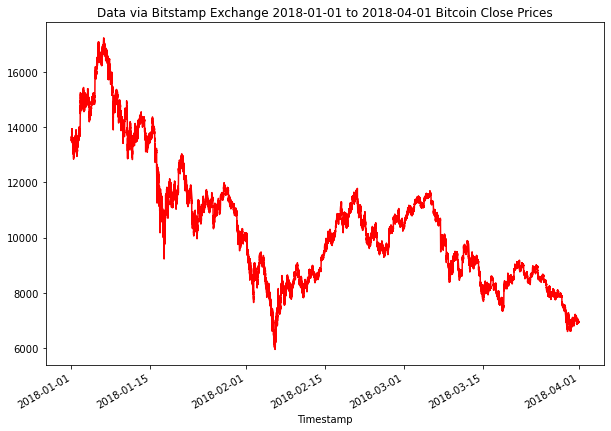

In [135]:
bitstamp_sliced.plot(title="Data via Bitstamp Exchange 2018-01-01 to 2018-04-01 Bitcoin Close Prices", figsize=(10,7), color="red")

#### Creating a line plot for the full time period dataset in the coinbase DataFrame. Figure size, title, and color are all tailored.

<AxesSubplot:title={'center':'Data via Coinbase Exchange 2018-01-01 to 2018-04-01 Bitcoin Close Prices'}, xlabel='Timestamp'>

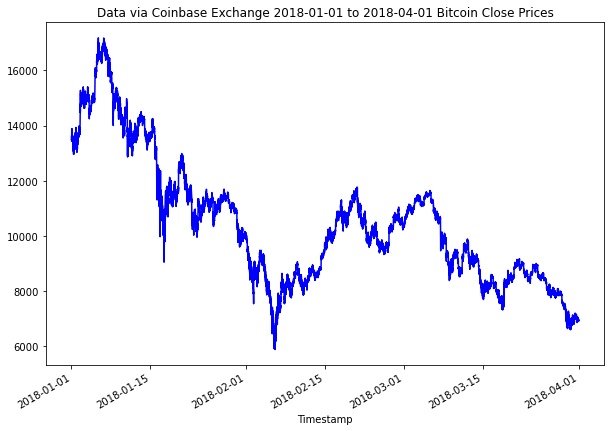

In [136]:
coinbase_sliced.plot(title="Data via Coinbase Exchange 2018-01-01 to 2018-04-01 Bitcoin Close Prices", figsize=(10,7), color="blue")

#### Overlaying visualizations for full time period datasets of bitstamp and coinbase DataFrames in one plot. Legend, figure size, title, and color are all tailored.

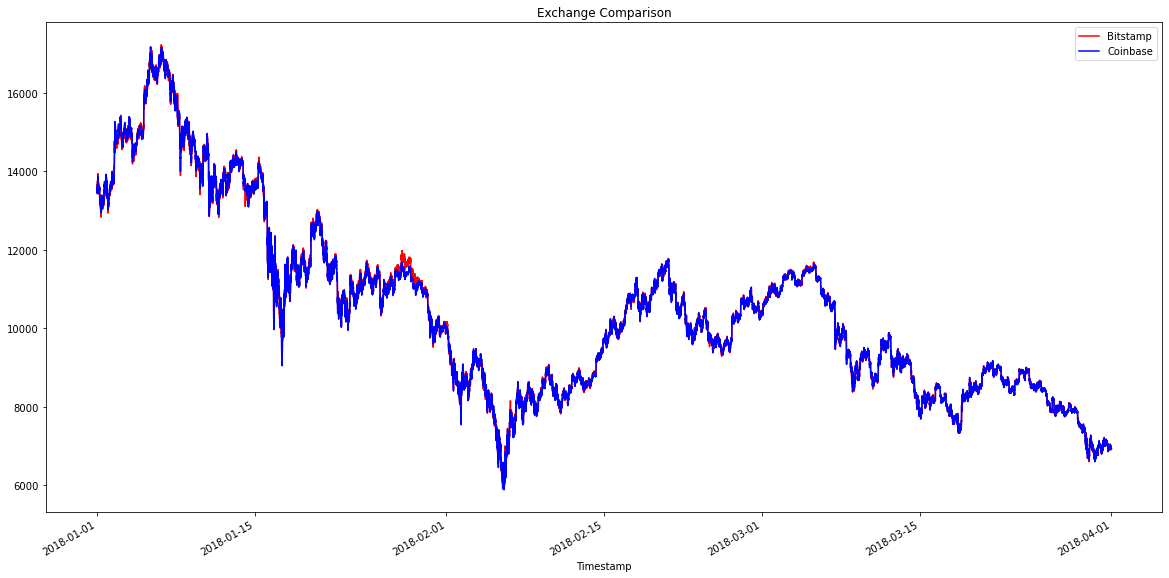

In [137]:
ax = bitstamp_sliced.plot(figsize=(20, 10),color="red", title='Exchange Comparison')
coinbase_sliced.plot(color="blue",ax=ax)

ax.legend(["Bitstamp", "Coinbase"])

#### Using the `loc` and `plot` functions, price action of the assets on each exchange are plotted for different dates and times. The goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define and view how the degree of spread change as time progresses.

#### Overlaying visualizations for one month period early in the datasets of bitstamp and coinbase DataFrames in one plot. Legend, figure size, title, and color are all tailored.

<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

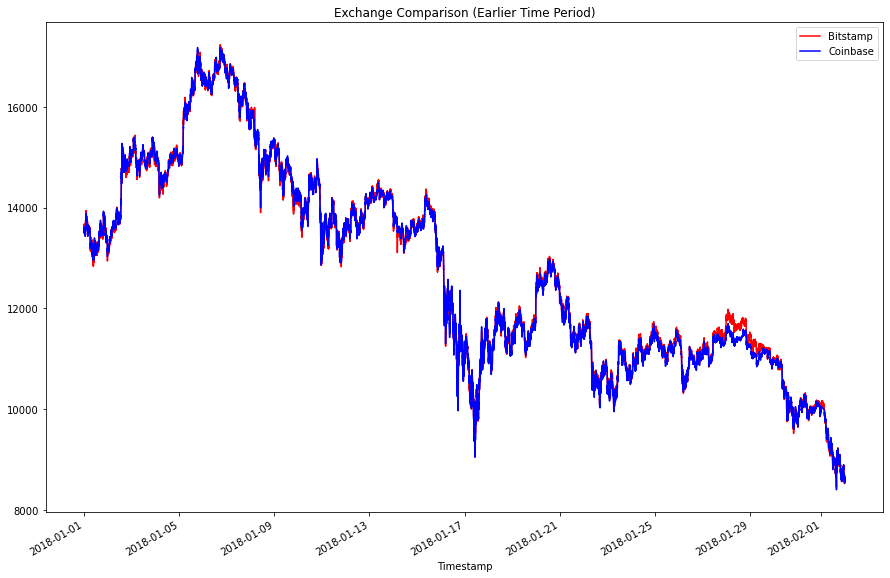

In [138]:
bitstamp_sliced.loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (Earlier Time Period)", color="red", label="Bitstamp")
coinbase_sliced.loc['2018-01-01' : '2018-02-01'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

#### Overlaying visualizations in one plot over a one month period in the middle of the bitstamp and coinbase datasets. Legend, figure size, title, and color are all tailored.

<AxesSubplot:title={'center':'Exchange Comparison (Later Time Period)'}, xlabel='Timestamp'>

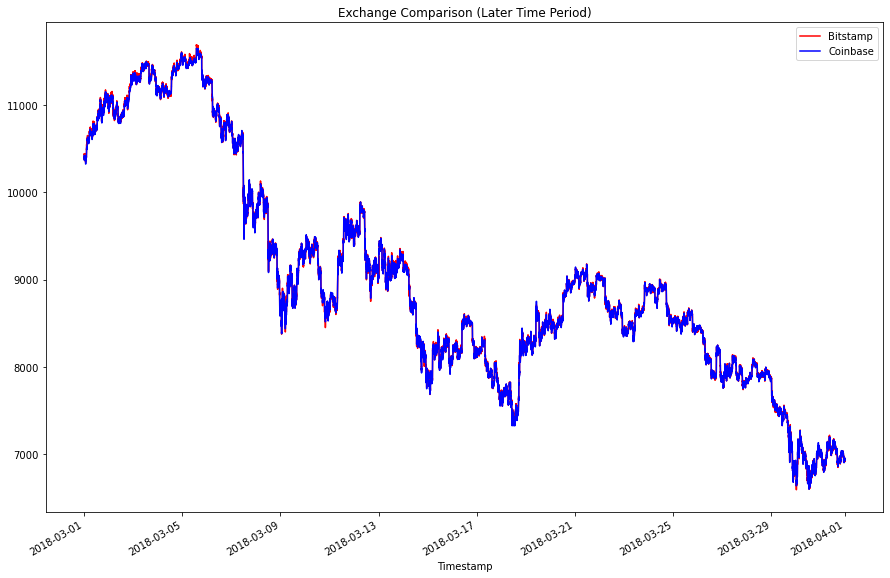

In [139]:
bitstamp_sliced.loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (Later Time Period)", color="red", label="Bitstamp")
coinbase_sliced.loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

#### Focusing Analysis on Specific Dates within bitstamp and coinbase DataFrames.

#### Overlaying visualizations in one plot over a specific day early in the bitstamp and coinbase datasets. Legend, figure size, title, and color are all tailored.

<AxesSubplot:title={'center':'Exchange Comparison - Jan 16, 2018'}, xlabel='Timestamp'>

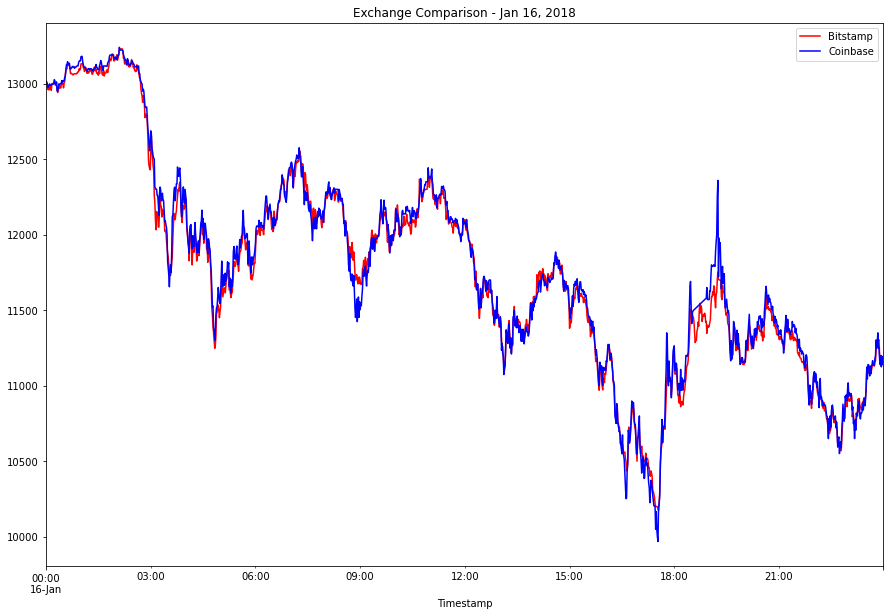

In [140]:
bitstamp_sliced.loc['2018-01-16'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison - Jan 16, 2018", color="red", label="Bitstamp")
coinbase_sliced.loc['2018-01-16'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

#### Calculating the arbitrage spread of bitstamp and coinbase DataFrames, generating summary statistics of arbitrage in the early dataset.

In [141]:
arbitrage_spread_early = coinbase_sliced.loc['2018-01-16'] - bitstamp_sliced.loc['2018-01-16']

arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

#### Visualizing the arbitrage spread from early in the dataset in a box plot.

<AxesSubplot:title={'center':'Arbitrage Spread - Jan 16, 2018'}>

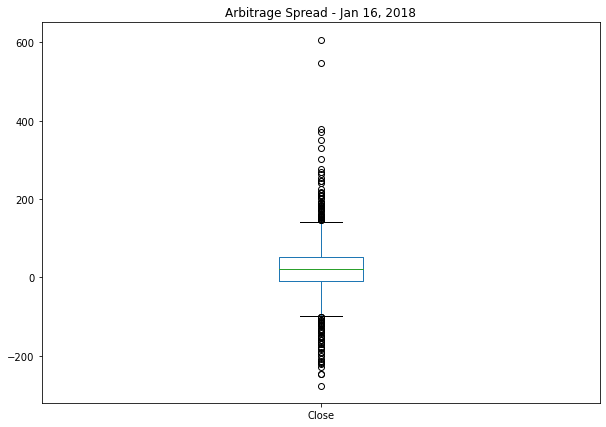

In [142]:
arbitrage_spread_early.plot(kind='box', figsize=(10, 7), title="Arbitrage Spread - Jan 16, 2018")

#### Overlaying visualizations in one plot over a specific day in the middle of the bitstamp and coinbase datasets. Legend, figure size, title, and color are all tailored.

<AxesSubplot:title={'center':'Exchange Comparison - Feb 24, 2018'}, xlabel='Timestamp'>

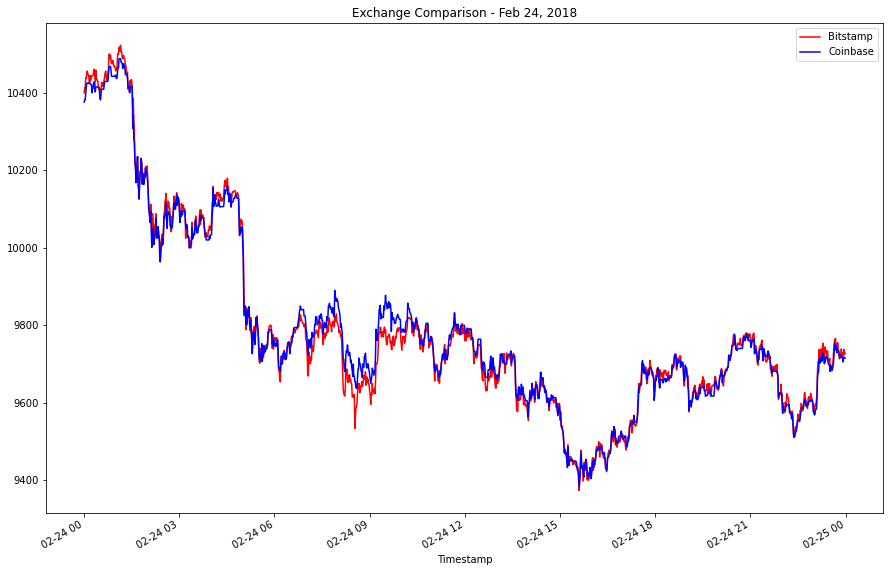

In [143]:
bitstamp_sliced.loc['2018-02-24'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison - Feb 24, 2018", color="red", label="Bitstamp")
coinbase_sliced.loc['2018-02-24'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

#### Calculating the arbitrage spread of bitstamp and coinbase DataFrames, generating summary statistics of arbitrage in the middle of the dataset.

In [144]:
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-24'] - bitstamp_sliced.loc['2018-02-24']

arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

#### Visualizing the arbitrage spread from the middle of the dataset in a box plot.

<AxesSubplot:title={'center':'Arbitrage Spread - Feb 24, 2018'}>

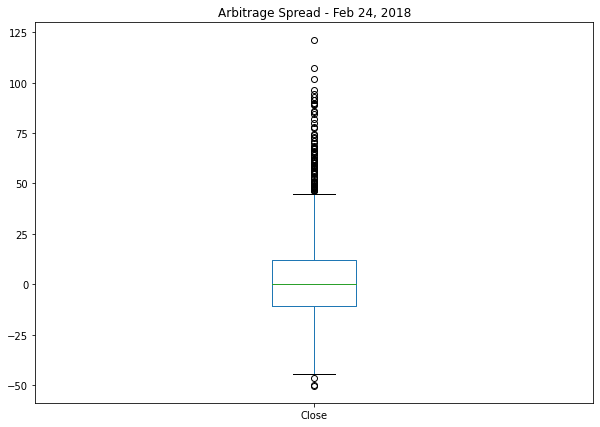

In [145]:
arbitrage_spread_middle.plot(kind='box', figsize=(10, 7), title="Arbitrage Spread - Feb 24, 2018")

#### Overlaying visualizations in one plot over a specific day late in the bitstamp and coinbase datasets. Legend, figure size, title, and color are all tailored.

<AxesSubplot:title={'center':'Exchange Comparison - Mar 26, 2018'}, xlabel='Timestamp'>

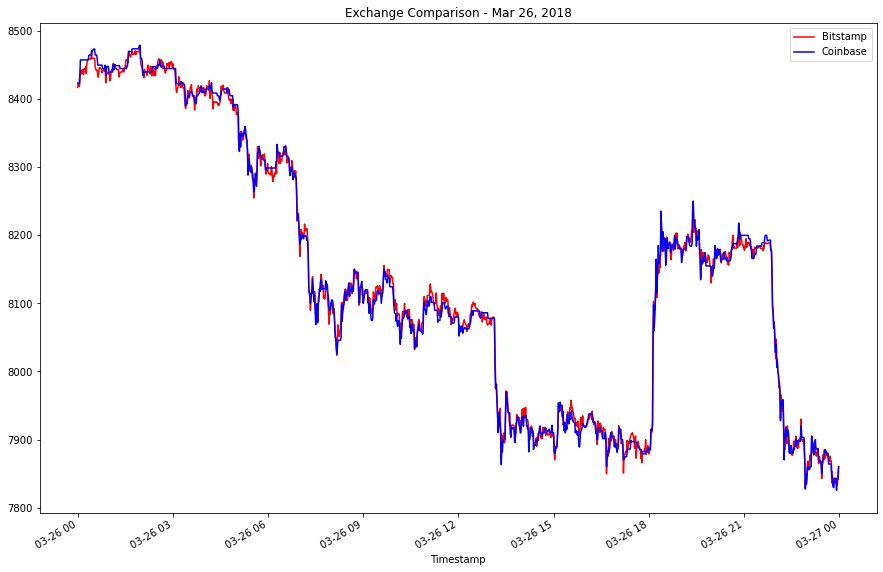

In [146]:
bitstamp_sliced.loc['2018-03-26'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison - Mar 26, 2018", color="red", label="Bitstamp")
coinbase_sliced.loc['2018-03-26'].plot(
    legend=True, figsize=(15, 10), color="blue", label="Coinbase")

#### Calculating the arbitrage spread of bitstamp and coinbase DataFrames, generating summary statistics of arbitrage late in the dataset.

In [147]:
arbitrage_spread_late = coinbase_sliced.loc['2018-03-26'] - bitstamp_sliced.loc['2018-03-26']

arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

#### Visualizing the arbitrage spread late in the dataset in a box plot.

<AxesSubplot:title={'center':'Arbitrage Spread - Mar 26, 2018'}>

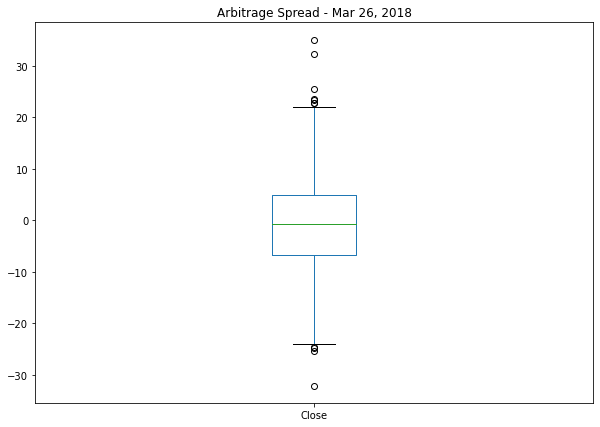

In [148]:
arbitrage_spread_late.plot(kind='box',figsize=(10, 7), title="Arbitrage Spread - Mar 26, 2018")

### Calculating Arbitrage Profits

#### Measuring the arbitrage spread of the bitstamp and coinbase DataFrames over three different time series.

#### Generating the early summary statistics for each `arbitrage_spread` DataFrame, where the spread is greater than zero.

In [149]:
arbitrage_spread_early = coinbase_sliced.loc['2018-01-16'] - bitstamp_sliced.loc['2018-01-16']

arbitrage_spread_early[arbitrage_spread_early > 0 ].describe()

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

#### Generating the middle summary statistics for each `arbitrage_spread` DataFrame, where the spread is greater than zero.

In [151]:
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-24'] - bitstamp_sliced.loc['2018-02-24']

arbitrage_spread_middle[arbitrage_spread_middle > 0 ].describe()

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

#### Generating the late summary statistics for each `arbitrage_spread` DataFrame, where the spread is greater than zero.

In [48]:
arbitrage_spread_late = coinbase_sliced.loc['2018-03-26'] - bitstamp_sliced.loc['2018-03-26']

arbitrage_spread_late[arbitrage_spread_late > 0 ].describe()

count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64

#### Calculating the spread returns of the bitstamp and coinbase DataFrames over three different time series.

In [152]:
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] /  bitstamp_sliced.loc['2018-01-16']

spread_return_early.head()

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

In [153]:
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] /  bitstamp_sliced.loc['2018-02-24']

spread_return_middle.head()

Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64

In [154]:
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] /  bitstamp_sliced.loc['2018-03-26']

spread_return_late.head()

Timestamp
2018-03-26 00:00:00    0.000738
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001395
Name: Close, dtype: float64

#### Determining the number of times the trades with positive returns exceed the 1% minimum threshold that are needed to cover trade costs by using the bitstamp and coinbase DataFrames over three different time series.

In [52]:
profitable_trades_early = spread_return_early[spread_return_early > .01]

profitable_trades_early.head()

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

In [53]:
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

profitable_trades_middle.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [54]:
profitable_trades_late = spread_return_late[spread_return_late > .01]

profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### Generating the summary statistics of spread returns that are greater than 1% and comparing how the average returns compare among the three dates.

In [155]:
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [156]:
profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [157]:
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### Calculating the potential profit, in dollars, per trade, any missing values from the resulting DataFrame are dropped.

In [58]:
profit_early = profitable_trades_early * bitstamp_sliced.loc['2018-01-16']

profit_per_trade_early = profit_early.dropna()

profit_per_trade_early.head()

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
Name: Close, dtype: float64

In [59]:
profit_middle = profitable_trades_middle * bitstamp_sliced.loc['2018-02-24']

profit_per_trade_middle = profit_middle.dropna()

profit_per_trade_middle.head()

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [60]:
profit_late = profitable_trades_late * bitstamp_sliced.loc['2018-03-26']

profit_per_trade_late = profit_late.dropna()

profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### Generating summary statistics and plotting the results for each of the three DataFrames.

In [158]:
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

In [159]:
profit_per_trade_middle.describe()

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

In [160]:
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### Plotting the results for the early profit per trade DataFrame.

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

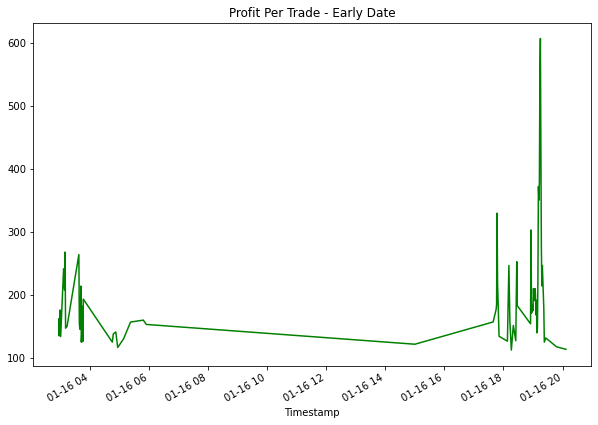

In [64]:
profit_per_trade_early.plot(figsize=(10, 7), title="Profit Per Trade - Early Date", color="green")

#### Plotting the results for the middle profit per trade DataFrame.

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date'}, xlabel='Timestamp'>

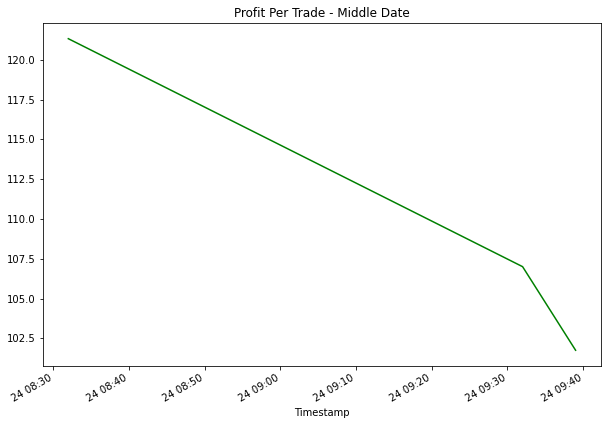

In [161]:
profit_per_trade_middle.plot(figsize=(10, 7), title="Profit Per Trade - Middle Date", color="green")

#### Plotting the results for the late profit per trade DataFrame **(NONE)**.

<AxesSubplot:title={'center':'Profit Per Trade - Late Date'}, xlabel='Timestamp'>

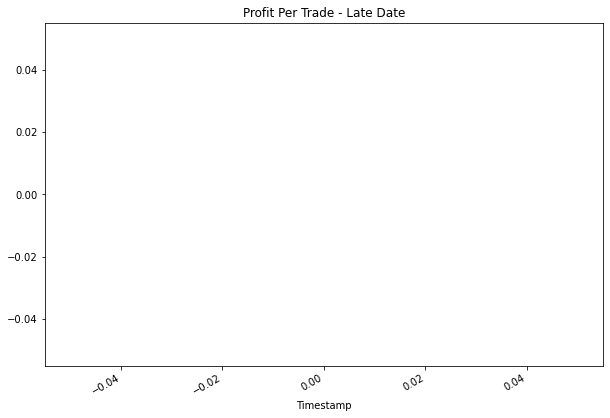

In [162]:
profit_per_trade_late.plot(figsize=(10, 7), title="Profit Per Trade - Late Date", color="green")

#### Calculating the potential arbitrage profits that you can make on each day.

In [163]:
profit_per_trade_early.sum()

14147.169999999998

In [164]:
profit_per_trade_middle.sum()

330.0699999999997

In [165]:
profit_per_trade_late.sum()

0.0

#### Using `cumsum` function to plot the cumulative sum of each of the three DataFrames to be used for identifying patterns or trends in the profits across the three time periods.

In [70]:
cumulative_profit_early = profit_per_trade_early.cumsum()

In [71]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()

In [72]:
cumulative_profit_late = profit_per_trade_late.cumsum()

#### Plotting the cumulative sum of profits for the early profit per trade DataFrame.

<AxesSubplot:title={'center':'Cumulative Early Bitcoin Profits'}, xlabel='Timestamp'>

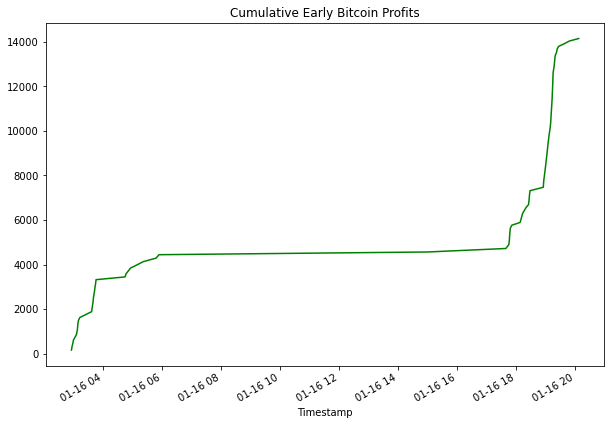

In [166]:
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Early Bitcoin Profits", color="green")

#### Plotting the cumulative sum of profits for the middle profit per trade DataFrame.

<AxesSubplot:title={'center':'Cumulative Middle Bitcoin Profits'}, xlabel='Timestamp'>

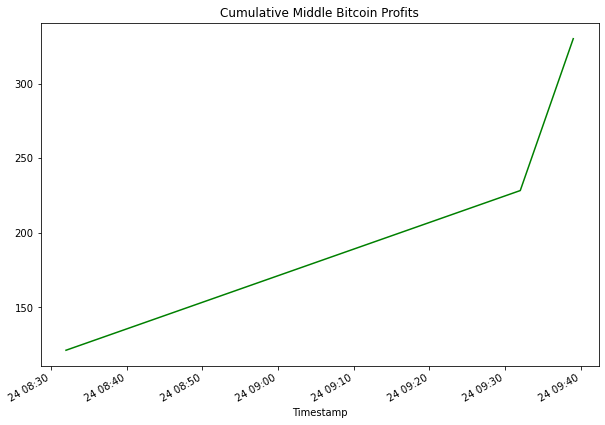

In [74]:
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Middle Bitcoin Profits", color="green")

#### Plotting the cumulative sum of profits for the late profit per trade DataFrame **(NONE)**.

<AxesSubplot:title={'center':'Cumulative Late Bitcoin Profits'}, xlabel='Timestamp'>

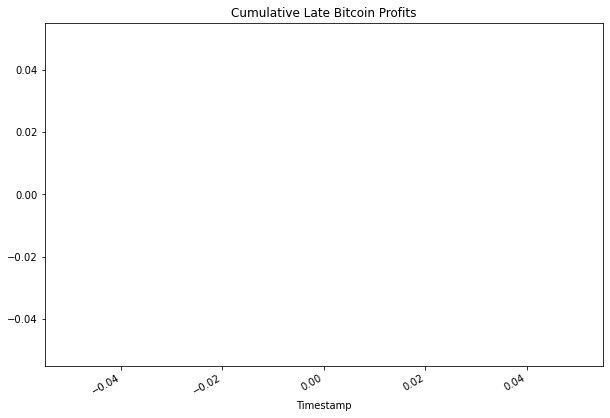

In [75]:
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Late Bitcoin Profits", color="green")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE